# Feed Forward Neural Networks

In [ ]:
# jupyter notebook

In [ ]:
### 210701~210711, 210821~210831 검증기간(총 22일간)

In [1]:
from tensorflow import keras
from keras.models import Sequential
from keras import Input
from keras.layers import Dense

import pandas as pd
import numpy as np
from tqdm import tqdm
import os
import matplotlib.pyplot as plt

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from tensorflow.keras.callbacks import ModelCheckpoint
from keras.models import load_model

In [2]:
from keras.callbacks import EarlyStopping

# Train

In [3]:
cd C:\weather\v1\data\train

C:\weather\v1\data\train


In [4]:
forders_tr = os.listdir()
forders_tr

['table_202001_v1.csv',
 'table_202002_v1.csv',
 'table_202003_v1.csv',
 'table_202004_v1.csv',
 'table_202005_v1.csv',
 'table_202006_v1.csv',
 'table_202007_v1.csv',
 'table_202008_v1.csv',
 'table_202009_v1.csv',
 'table_202010_v1.csv',
 'table_202011_v1.csv',
 'table_202012_v1.csv',
 'table_202101_v1.csv',
 'table_202102_v1.csv',
 'table_202103_v1.csv',
 'table_202104_v1.csv',
 'table_202105_v1.csv',
 'table_202106_v1.csv']

In [5]:
# 새로운 데이터 프레임 생성
train = pd.DataFrame()

for files in forders_tr:
    df= pd.read_csv(files)
    train = pd.concat([train, df])

In [6]:
train

,YearMonthDayHourMinute,STN,Lon,Lat,isitu-LST,Band1,Band2,Band3,Band4,Band5,...,insitu-TED0.1,insitu-TED0.2,insitu-TED0.3,insitu-TED0.5,insitu-TED1.0,insitu-TED1.5,insitu-TED3.0,insitu-TED5.0,insitu-PA,insitu-PS
0,202001010000,90,128.56473,38.25085,-2.6,0.00000,0.00000,-0.00060,-0.00030,-0.0003,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,1025.2,1027.5
1,202001010000,95,127.30420,38.14787,-2.6,-0.00057,-0.00057,0.00030,-0.00060,-0.0003,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,1014.1,1034.6
2,202001010000,98,127.06070,37.90188,-3.1,0.00000,0.00000,0.00030,0.00060,-0.0003,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,1019.6,1034.8
3,202001010000,99,126.76648,37.88589,-3.4,-0.00057,-0.00057,-0.00030,0.00015,0.0000,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,1030.6,1034.6
4,202001010000,101,127.73570,37.90262,-3.6,-0.00057,0.00000,0.00030,0.00030,0.0000,...,-0.6,0.7,1.5,3.1,6.9,10.2,15.1,16.9,1024.0,1034.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447705,202106302350,973,126.94961,35.02330,23.6,-0.00057,-0.00057,-0.00179,-0.00060,-0.0003,...,26.6,26.0,25.9,24.3,21.7,-999.0,-999.0,-999.0,1003.2,1007.8
447706,202106302350,974,128.15605,35.24435,20.7,0.00000,-0.00057,0.00089,0.00015,0.0000,...,27.1,27.3,27.3,25.6,21.8,-999.0,-999.0,-999.0,-999.0,-999.0
447707,202106302350,977,127.46688,36.72455,23.9,-0.00057,-0.00057,-0.00060,0.00015,0.0000,...,26.3,26.2,25.5,24.4,22.0,-999.0,-999.0,-999.0,-999.0,-999.0
447708,202106302350,978,127.77626,37.95461,23.2,-0.00057,0.00000,0.00030,-0.00075,-0.0003,...,26.0,25.6,24.6,23.7,20.9,-999.0,-999.0,-999.0,-999.0,-999.0


# Validation

In [7]:
cd C:\weather\v1\data\val

C:\weather\v1\data\val


In [8]:
forders_val = os.listdir()
forders_val

['table_202109_v1.csv',
 'table_202110_v1.csv',
 'table_202111_v1.csv',
 'table_202112_v1.csv']

In [9]:
# 새로운 데이터 프레임 생성
val = pd.DataFrame()

for files in forders_val:
    df= pd.read_csv(files)
    val = pd.concat([val, df])

In [10]:
val

,YearMonthDayHourMinute,STN,Lon,Lat,isitu-LST,Band1,Band2,Band3,Band4,Band5,...,insitu-TED0.1,insitu-TED0.2,insitu-TED0.3,insitu-TED0.5,insitu-TED1.0,insitu-TED1.5,insitu-TED3.0,insitu-TED5.0,insitu-PA,insitu-PS
0,202109010000,90,128.56473,38.25085,17.9,0.00170,0.00171,0.00238,0.00195,0.00181,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,1012.7,1014.8
1,202109010000,93,127.75443,37.94738,19.0,0.00170,0.00171,0.00149,0.00180,0.00121,...,21.1,22.5,23.5,24.3,24.6,23.8,21.2,17.7,1001.1,1012.3
2,202109010000,95,127.30420,38.14787,17.6,0.00170,0.00228,0.00179,0.00195,0.00151,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,994.6,1012.7
3,202109010000,98,127.06070,37.90188,19.3,0.00227,0.00228,0.00238,0.00374,0.00181,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,998.6,1012.1
4,202109010000,99,126.76648,37.88589,19.6,0.00227,0.00228,0.00268,0.00239,0.00151,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,1008.2,1011.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
432625,202112312350,702,126.99435,35.94504,-3.2,-0.00057,-0.00057,-0.00030,-0.00045,-0.00030,...,0.6,1.3,2.6,3.6,6.2,-999.0,-999.0,-999.0,-999.0,-999.0
432626,202112312350,972,128.68340,36.54983,-4.8,-0.00057,0.00057,0.00089,-0.00015,0.00000,...,0.1,1.4,2.1,2.5,5.3,-999.0,-999.0,-999.0,1021.2,1032.8
432627,202112312350,973,126.94961,35.02330,-2.4,0.00000,-0.00057,-0.00179,0.00015,-0.00030,...,2.0,2.9,4.0,5.6,8.7,-999.0,-999.0,-999.0,1028.5,1033.7
432628,202112312350,974,128.15605,35.24435,-1.8,-0.00057,-0.00057,0.00060,-0.00015,0.00000,...,0.8,0.4,3.4,4.6,9.4,-999.0,-999.0,-999.0,-999.0,-999.0


# Test

In [11]:
cd C:\weather\v1\data\test

C:\weather\v1\data\test


In [12]:
forders_te = os.listdir()
forders_te

['table_202107_1_v1.csv', 'table_202108_2_v1.csv']

In [13]:
### 210701~210711, 210821~210831 검증기간(총 22일간)

# 새로운 데이터 프레임 생성
test = pd.DataFrame()

for files in forders_te:
    df= pd.read_csv(files)
    test = pd.concat([test, df])

In [14]:
test

,YearMonthDayHourMinute,STN,Lon,Lat,Band1,Band2,Band3,Band4,Band5,Band6,...,insitu-TED0.1,insitu-TED0.2,insitu-TED0.3,insitu-TED0.5,insitu-TED1.0,insitu-TED1.5,insitu-TED3.0,insitu-TED5.0,insitu-PA,insitu-PS
0,202107000000,90,128.56473,38.25085,-0.00057,-0.00057,-0.00149,-0.00045,-0.00060,0.00000,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,1006.2,1008.2
1,202107000000,93,127.75443,37.94738,-0.00057,-0.00057,-0.00119,0.00000,0.00000,-0.00065,...,24.3,25.6,25.6,24.6,21.9,19.5,15.3,13.5,996.8,1007.8
2,202107000000,95,127.30420,38.14787,-0.00057,-0.00057,-0.00060,0.00015,0.00000,-0.00065,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,990.4,1008.2
3,202107000000,98,127.06070,37.90188,-0.00057,-0.00057,0.00030,-0.00015,-0.00030,-0.00065,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,994.8,1008.1
4,202107000000,99,126.76648,37.88589,-0.00057,0.00000,-0.00060,-0.00105,0.00000,-0.00065,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,1004.6,1008.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27087,202108000000,973,126.94961,35.02330,0.00000,0.00000,0.00030,0.00015,0.00121,0.00000,...,28.3,27.7,27.8,26.8,25.1,-999.0,-999.0,-999.0,1008.8,1013.3
27088,202108000000,974,128.15605,35.24435,0.00000,0.00057,0.00000,0.00015,0.00000,0.00000,...,28.6,28.7,28.8,27.9,25.6,-999.0,-999.0,-999.0,-999.0,-999.0
27089,202108000000,977,127.46688,36.72455,0.00000,0.00057,-0.00179,0.00030,0.00000,0.00000,...,24.2,24.5,24.7,24.7,24.4,-999.0,-999.0,-999.0,-999.0,-999.0
27090,202108000000,978,127.77626,37.95461,0.00000,0.00000,0.00089,0.00015,-0.00030,0.00000,...,22.8,23.8,24.3,24.2,24.1,-999.0,-999.0,-999.0,-999.0,-999.0


# Submission

In [15]:
cd C:\weather\data

C:\weather\data


In [16]:
# Set Pandas options to display more columns
# pd.options.display.max_columns=50
submission=pd.read_csv('1-2_검증데이터셋.csv', encoding='utf-8')
submission

,YearMonthDayHourMinute,STN,isitu-LST,insitu-TA
0,202107010030,90,NaN,NaN
1,202107010030,93,NaN,NaN
2,202107010030,95,NaN,NaN
3,202107010030,98,NaN,NaN
4,202107010030,99,NaN,NaN
...,...,...,...,...
54498,202108312330,973,NaN,NaN
54499,202108312330,974,NaN,NaN
54500,202108312330,977,NaN,NaN
54501,202108312330,978,NaN,NaN


# 모델 Train

In [17]:
train

,YearMonthDayHourMinute,STN,Lon,Lat,isitu-LST,Band1,Band2,Band3,Band4,Band5,...,insitu-TED0.1,insitu-TED0.2,insitu-TED0.3,insitu-TED0.5,insitu-TED1.0,insitu-TED1.5,insitu-TED3.0,insitu-TED5.0,insitu-PA,insitu-PS
0,202001010000,90,128.56473,38.25085,-2.6,0.00000,0.00000,-0.00060,-0.00030,-0.0003,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,1025.2,1027.5
1,202001010000,95,127.30420,38.14787,-2.6,-0.00057,-0.00057,0.00030,-0.00060,-0.0003,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,1014.1,1034.6
2,202001010000,98,127.06070,37.90188,-3.1,0.00000,0.00000,0.00030,0.00060,-0.0003,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,1019.6,1034.8
3,202001010000,99,126.76648,37.88589,-3.4,-0.00057,-0.00057,-0.00030,0.00015,0.0000,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,1030.6,1034.6
4,202001010000,101,127.73570,37.90262,-3.6,-0.00057,0.00000,0.00030,0.00030,0.0000,...,-0.6,0.7,1.5,3.1,6.9,10.2,15.1,16.9,1024.0,1034.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447705,202106302350,973,126.94961,35.02330,23.6,-0.00057,-0.00057,-0.00179,-0.00060,-0.0003,...,26.6,26.0,25.9,24.3,21.7,-999.0,-999.0,-999.0,1003.2,1007.8
447706,202106302350,974,128.15605,35.24435,20.7,0.00000,-0.00057,0.00089,0.00015,0.0000,...,27.1,27.3,27.3,25.6,21.8,-999.0,-999.0,-999.0,-999.0,-999.0
447707,202106302350,977,127.46688,36.72455,23.9,-0.00057,-0.00057,-0.00060,0.00015,0.0000,...,26.3,26.2,25.5,24.4,22.0,-999.0,-999.0,-999.0,-999.0,-999.0
447708,202106302350,978,127.77626,37.95461,23.2,-0.00057,0.00000,0.00030,-0.00075,-0.0003,...,26.0,25.6,24.6,23.7,20.9,-999.0,-999.0,-999.0,-999.0,-999.0


In [18]:
# # Set Pandas options to display more columns
# pd.options.display.max_columns=100
# train.describe().loc[['min','max']]

In [25]:
# pd.options.display.max_columns=100
# val.describe().loc[['min','max']]

,YearMonthDayHourMinute,STN,Lon,Lat,isitu-LST,Band1,Band2,Band3,Band4,Band5,Band6,Band7,Band8,Band9,Band10,Band11,Band12,Band13,Band14,Band15,Band16,30daysBand3,30daysBand13,GK2A-LST,SolarZA,SateZA,ESR,Height,LandType,insitu-TA,insitu-HM,insitu-TD,insitu-TG,insitu-TED0.05,insitu-TED0.1,insitu-TED0.2,insitu-TED0.3,insitu-TED0.5,insitu-TED1.0,insitu-TED1.5,insitu-TED3.0,insitu-TED5.0,insitu-PA,insitu-PS,Year,Month,Day,Hour,Minute,mean_6_23,mean_34_37,mean_38_39,mean_40_42,mean_43_44
min,2.021090e+11,90.0,124.71237,33.24616,-4.9,-999.00000,-999.00000,-999.00000,-999.00000,-999.00000,-999.00000,-999.00000,-999.00000,-999.0000,-999.00000,-999.00000,-999.00000,-999.00000,-999.00000,-999.00,-999.00000,-999.00000,-999.00000,-999.00,25.10253,38.87646,-9.63086,1.41,0.0,-14.8,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,2021.0,9.0,1.0,0.0,0.0,-3.36516,-11.386057,-10.797214,-12.635757,-25.215453
max,2.021123e+11,980.0,130.89864,38.25085,53.3,1.07294,1.07496,1.11638,1.20345,4.94935,10.56872,316.33305,255.38325,265.0663,271.20551,304.27647,273.94003,307.36225,307.75463,304.14,281.02955,0.40471,307.41874,43.12,170.04794,44.52481,8.38473,772.43,4.0,33.2,100.0,28.2,56.3,41.6,41.0,30.3,29.9,29.2,28.5,26.9,26.2,24.4,1036.0,1040.2,2021.0,12.0,31.0,23.0,50.0,11.32197,4.242249,3.728400,2.536353,2.341723


In [24]:
# pd.options.display.max_columns=100
# test.describe().loc[['min','max']]

,YearMonthDayHourMinute,STN,Lon,Lat,Band1,Band2,Band3,Band4,Band5,Band6,Band7,Band8,Band9,Band10,Band11,Band12,Band13,Band14,Band15,Band16,30daysBand3,30daysBand13,GK2A-LST,SolarZA,SateZA,ESR,Height,LandType,insitu-HM,insitu-TD,insitu-TG,insitu-TED0.05,insitu-TED0.1,insitu-TED0.2,insitu-TED0.3,insitu-TED0.5,insitu-TED1.0,insitu-TED1.5,insitu-TED3.0,insitu-TED5.0,insitu-PA,insitu-PS,Year,Month,Day,Hour,Minute,mean_6_23,mean_34_37,mean_38_39,mean_40_42,mean_43_44
min,2.020000e+11,90.0,124.71237,33.24616,-999.00000,-999.00000,-999.00000,-999.00000,-999.00000,-999.000,-999.0000,-999.00000,-999.00000,-999.00000,-999.00000,-999.00000,-999.00000,-999.00000,-999.00000,-999.00000,-999.00000,-999.0000,-999.00,10.27199,38.87646,-6.93926,1.41,0.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,2020.0,0.0,0.0,0.0,0.0,-2.334741,-2.557499,-2.477174,-4.246144,-4.629797
max,2.021080e+11,980.0,130.89864,38.25085,1.14828,1.15594,1.18284,1.10111,0.59447,0.694,316.1373,259.12558,267.02212,272.10078,301.33515,273.47044,305.27573,303.65291,297.72855,277.33724,0.36299,309.0118,43.62,137.91838,44.52481,9.01452,772.43,4.0,100.0,28.6,65.9,48.1,35.4,30.3,29.6,29.1,28.0,26.6,25.3,22.0,1016.7,1019.7,2021.0,8.0,0.0,0.0,0.0,1.690106,4.017597,2.699365,1.770670,1.907618


In [19]:
##### Step 1 - Select data for modeling(training data & validation data
X_train = train[['Band1','Band2','Band3','Band4', 'insitu-TED0.05', 'insitu-HM', 'insitu-TD', 'insitu-TG']]
X_test = val[['Band1','Band2','Band3','Band4', 'insitu-TED0.05', 'insitu-HM', 'insitu-TD', 'insitu-TG']]

y_train=train[['isitu-LST', 'insitu-TA']].values
y_test=val[['isitu-LST', 'insitu-TA']].values

X_train

,Band1,Band2,Band3,Band4,insitu-TED0.05,insitu-HM,insitu-TD,insitu-TG
0,0.00000,0.00000,-0.00060,-0.00030,-999.0,30.3,-17.7,-4.2
1,-0.00057,-0.00057,0.00030,-0.00060,-999.0,64.1,-14.5,-7.9
2,0.00000,0.00000,0.00030,0.00060,-999.0,58.4,-14.7,-7.4
3,-0.00057,-0.00057,-0.00030,0.00015,-999.0,52.8,-15.4,-6.5
4,-0.00057,0.00000,0.00030,0.00030,-0.5,66.0,-14.3,-14.1
...,...,...,...,...,...,...,...,...
447705,-0.00057,-0.00057,-0.00179,-0.00060,26.7,96.9,20.0,19.4
447706,0.00000,-0.00057,0.00089,0.00015,26.2,93.5,18.7,-999.0
447707,-0.00057,-0.00057,-0.00060,0.00015,26.7,98.3,21.6,21.9
447708,-0.00057,0.00000,0.00030,-0.00075,25.3,95.9,20.1,19.2


In [20]:
X_test

,Band1,Band2,Band3,Band4,insitu-TED0.05,insitu-HM,insitu-TD,insitu-TG
0,0.00170,0.00171,0.00238,0.00195,-999.0,97.3,16.9,17.8
1,0.00170,0.00171,0.00149,0.00180,20.3,98.5,17.5,17.5
2,0.00170,0.00228,0.00179,0.00195,-999.0,100.0,17.1,17.1
3,0.00227,0.00228,0.00238,0.00374,-999.0,99.9,17.7,18.1
4,0.00227,0.00228,0.00268,0.00239,-999.0,99.8,17.7,18.0
...,...,...,...,...,...,...,...,...
432625,-0.00057,-0.00057,-0.00030,-0.00045,0.1,82.1,-10.7,-9.7
432626,-0.00057,0.00057,0.00089,-0.00015,0.2,40.1,-17.3,-8.5
432627,0.00000,-0.00057,-0.00179,0.00015,2.3,53.4,-11.7,-4.8
432628,-0.00057,-0.00057,0.00060,-0.00015,0.6,36.2,-15.7,-999.0


In [21]:
##### Step 2 - Create training and testing samples
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


##### Step 3 - Specify the structure of a neural network
model2 = Sequential(name="Model-with-Two-Inputs")
model2.add(Input(shape=(len(X_train.columns),), name='Input-Layer'))
model2.add(Dense(len(X_train.columns), activation='relu', name='Hidden-Layer1'))
model2.add(Dense(len(X_train.columns), activation='relu', name='Hidden-Layer2'))
model2.add(Dense(len(X_train.columns), activation='relu', name='Hidden-Layer3'))
model2.add(Dense(2, activation='relu', name='Output-Layer'))


##### Step 4 - Compile the keras model
model2.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['mse'],
              loss_weights=None,
              weighted_metrics=None,
              run_eagerly=None, 
              steps_per_execution=None 
             )

model2.summary()

Model: "Model-with-Two-Inputs"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden-Layer1 (Dense)       (None, 8)                 72        
                                                                 
 Hidden-Layer2 (Dense)       (None, 8)                 72        
                                                                 
 Hidden-Layer3 (Dense)       (None, 8)                 72        
                                                                 
 Output-Layer (Dense)        (None, 2)                 18        
                                                                 
Total params: 234
Trainable params: 234
Non-trainable params: 0
_________________________________________________________________


In [52]:
cd C:\weather\v1

C:\weather\v1


In [53]:
os.getcwd()

'C:\\weather\\v1'

In [24]:
es = EarlyStopping(monitor='val_mse', verbose=1, patience=10)

In [25]:
##### Step 5 - Fit keras model on the dataset

# Set Directory
save_dir = os.path.join(os.getcwd(),'save')

model_name = 'ffnn_v1.{epoch:02d}.h5' 
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
filepath = os.path.join(save_dir, model_name)


checkpoint = ModelCheckpoint(filepath=filepath,
                             monitor='val_mse',
                             verbose=1,
                             save_best_only=True)

callbacks = [checkpoint,es]                  

In [26]:
hist = model2.fit(X_train.to_numpy(),       # input data
          y_train,                 # target data
          batch_size=32,    
          epochs=100,         # 늘려야 할 부분     
          validation_data=(X_test, y_test),
          shuffle=True,
          callbacks=callbacks)

Epoch 1/100
256320/256334 [============================>.] - ETA: 0s - loss: 8.6434 - mse: 8.6434
Epoch 1: val_mse improved from inf to 7.49444, saving model to C:\weather\save\ffnn_v1.01.h5
256334/256334 [==============================] - 844s 3ms/step - loss: 8.6433 - mse: 8.6433 - val_loss: 7.4944 - val_mse: 7.4944
Epoch 2/100
256333/256334 [============================>.] - ETA: 0s - loss: 6.4289 - mse: 6.4289
Epoch 2: val_mse did not improve from 7.49444
256334/256334 [==============================] - 870s 3ms/step - loss: 6.4289 - mse: 6.4289 - val_loss: 7.5704 - val_mse: 7.5704
Epoch 3/100
256327/256334 [============================>.] - ETA: 0s - loss: 6.3568 - mse: 6.3568
Epoch 3: val_mse did not improve from 7.49444
256334/256334 [==============================] - 925s 4ms/step - loss: 6.3568 - mse: 6.3568 - val_loss: 7.5012 - val_mse: 7.5012
Epoch 4/100
256324/256334 [============================>.] - ETA: 0s - loss: 5.5508 - mse: 5.5508
Epoch 4: val_mse improved from 7.494

In [29]:
model2.save('ffnn_v1.h5')

In [30]:
# convert the history.history dict to a pandas DataFrame:     
hist_df = pd.DataFrame(hist.history) 

# or save to csv: 
hist_csv_file = 'ffnn_v1_history.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

In [ ]:
# hh = pd.read_csv('ffnn_v1_history.csv')
# hh

# 시각화

Loss

In [31]:
def Plot_history(history):
  plt.subplot(211)
  plt.plot(hist.history['loss'], color = 'b', label = 'train')
  plt.plot(hist.history['val_loss'], color = 'g', label = 'test')
  plt.ylabel('Loss')
  plt.legend()

#   plt.subplot(212)
#   plt.plot(hist.history['mse'], color = 'r', label = 'train')
#   plt.plot(hist.history['val_mse'], color = 'black', label = 'test')
#   plt.xlabel('Epoch')
#   plt.ylabel('mse')
#   plt.legend()
#   plt.show()  

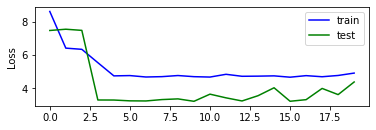

In [32]:
Plot_history(hist)

In [61]:
cd C:\weather\v1\save

C:\weather\v1\save


In [62]:
forders_te = os.listdir()
forders_te

['ffnn_v1.01.h5',
 'ffnn_v1.02.h5',
 'ffnn_v1.03.h5',
 'ffnn_v1.04.h5',
 'ffnn_v1.05.h5',
 'ffnn_v1.06.h5',
 'ffnn_v1.07.h5',
 'ffnn_v1.10.h5']

In [64]:
# 조기종료 되게만든 weight 적용
model = load_model(forders_te[-1])
scores = model.evaluate(X_test, y_test)
print('Test loss:', scores[0])
print('Test mse:', scores[1])

55630/55630 [==============================] - 159s 3ms/step - loss: 3.2185 - mse: 3.2185
Test loss: 3.2185184955596924
Test mse: 3.2185184955596924


LST,TA

In [65]:
pred_te = model.predict(X_test)
pred_te

55630/55630 [==============================] - 150s 3ms/step


array([[18.409    , 17.350788 ],
       [18.879725 , 17.435171 ],
       [17.90634  , 16.976433 ],
       ...,
       [ 0.       ,  0.       ],
       [ 0.       ,  1.10155  ],
       [ 2.371488 ,  2.7309108]], dtype=float32)

In [66]:
lst_pr = []
ta_pr = []
for i in range(len(pred_te)):
    lst_pr.append(pred_te[i][0])
    ta_pr.append(pred_te[i][1])

In [67]:
lst_re = []
ta_re = []
for i in range(len(y_test)):
    lst_re.append(y_test[i][0])
    ta_re.append(y_test[i][1])

In [68]:
def value_compare():
  plt.subplot(211)
  plt.plot(lst_pr[500:550], color = 'b', label = 'pred')
  plt.plot(lst_re[500:550], color = 'g', label = 'real')
  plt.ylabel('LST')
  plt.legend()

  plt.subplot(212)
  plt.plot(ta_pr[700:750], color = 'r', label = 'pred')
  plt.plot(ta_re[700:750], color = 'black', label = 'real')
  plt.ylabel('TA')
  plt.legend()
  plt.show()  

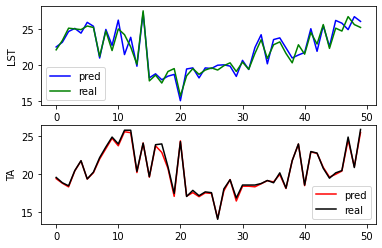

In [69]:
value_compare()

# 예측 값 파일에 저장

In [70]:
test_ = test[['Band1','Band2','Band3','Band4', 'insitu-TED0.05', 'insitu-HM', 'insitu-TD', 'insitu-TG']]

In [71]:
pred = model.predict(test_)
pred

1704/1704 [==============================] - 5s 3ms/step


array([[21.55196 , 20.876928],
       [21.527815, 20.544718],
       [19.71646 , 18.874146],
       ...,
       [23.624214, 20.041656],
       [19.627539, 17.111586],
       [27.204344, 24.231627]], dtype=float32)

In [72]:
submission1 = submission.copy()
submission1

,YearMonthDayHourMinute,STN,isitu-LST,insitu-TA
0,202107010030,90,NaN,NaN
1,202107010030,93,NaN,NaN
2,202107010030,95,NaN,NaN
3,202107010030,98,NaN,NaN
4,202107010030,99,NaN,NaN
...,...,...,...,...
54498,202108312330,973,NaN,NaN
54499,202108312330,974,NaN,NaN
54500,202108312330,977,NaN,NaN
54501,202108312330,978,NaN,NaN


In [73]:
submission1[['isitu-LST', 'insitu-TA']] = pred
submission1

,YearMonthDayHourMinute,STN,isitu-LST,insitu-TA
0,202107010030,90,21.551960,20.876928
1,202107010030,93,21.527815,20.544718
2,202107010030,95,19.716459,18.874146
3,202107010030,98,20.230032,19.490515
4,202107010030,99,20.550865,19.909849
...,...,...,...,...
54498,202108312330,973,26.231415,24.002497
54499,202108312330,974,21.712696,23.060122
54500,202108312330,977,23.624214,20.041656
54501,202108312330,978,19.627539,17.111586


In [74]:
cd C:\weather\v1

C:\weather\v1


In [75]:
submission1.to_csv("ffnn_v1_220224.csv", index = False)    # 접수번호로 저장